### Task 3- Exploratory Data Analysis
  <i>- Sawan Shivanand beli</i>

### Problem Statement

Given the data set: https://bit.ly/3i4rbWl  
Perform Exploratory Data Analysis on dataset SampleSuperstore(Link above).     
As a business manager, try to find out the weak areas where you can
work to make more profit.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
store_df=pd.read_csv("SampleSuperstore.csv")
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Understaninding the data

In [3]:
store_df.shape

(9994, 13)

In [4]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
store_df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- There are no missing values in the data sets

In [9]:
store_df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

- Since the entire data is of one country(United States). Hence we can drop the column.

In [10]:
store_df.drop(['Country'],axis=1)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
store_df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
store_df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### Data Visualization

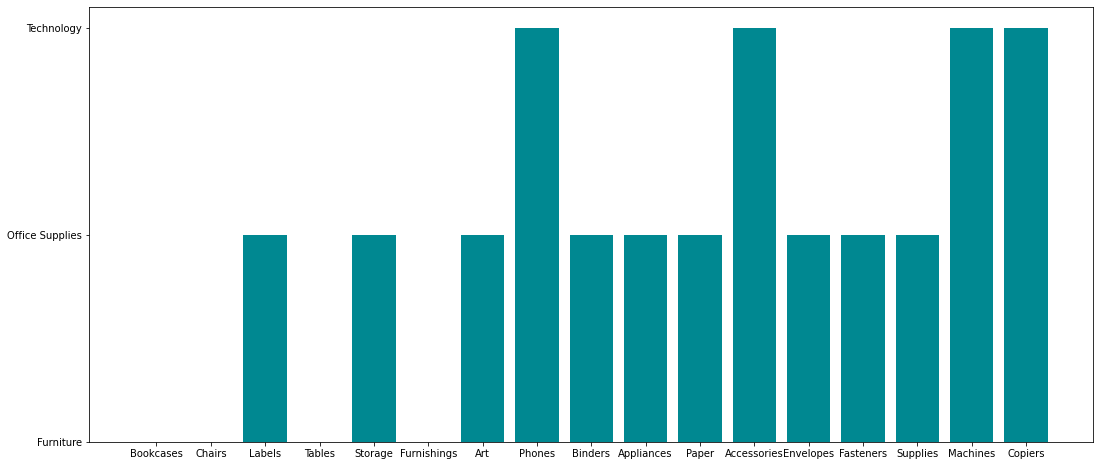

In [13]:
#lets see how categories are divided into sub-categories
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data=store_df,color='#008891')
plt.show()

- Above graph gives a clear understanding of which sub-categories belongs to what category.

In [14]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 17)

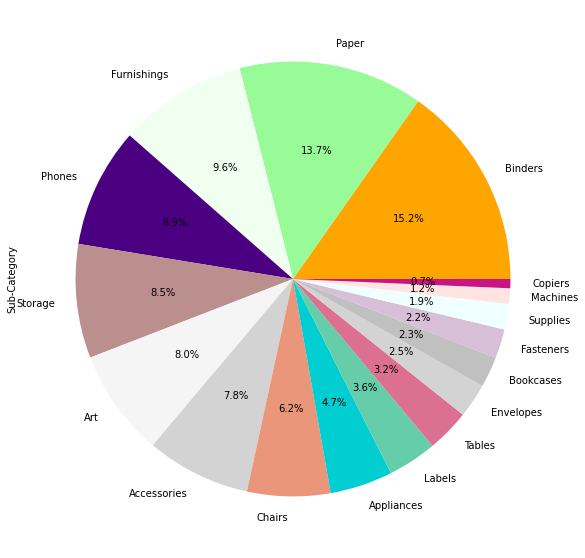

In [15]:
plt.figure(figsize=(12,10))
store_df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%",colors=colors)
plt.show()

- The above Pie-chart plotted on sub-categories shows that office supplies have wide varieties.

In [16]:
store_df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Region'>

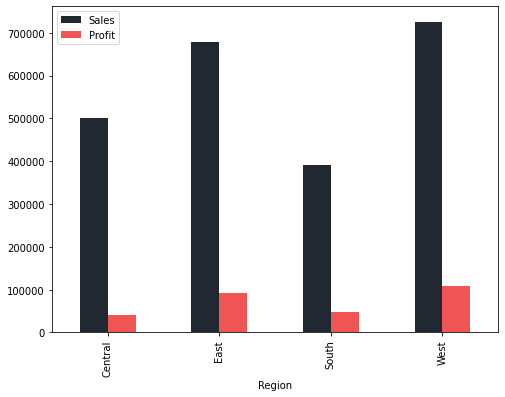

In [17]:
store_df.groupby(['Region'])['Sales','Profit'].sum().plot.bar(color=['#222831','#f05454'],figsize=(8,6))

#### Observations:
- South Region has lowest sales and profit among all other regions.
- West has higher sales and profit than other regions.

<AxesSubplot:xlabel='Category', ylabel='count'>

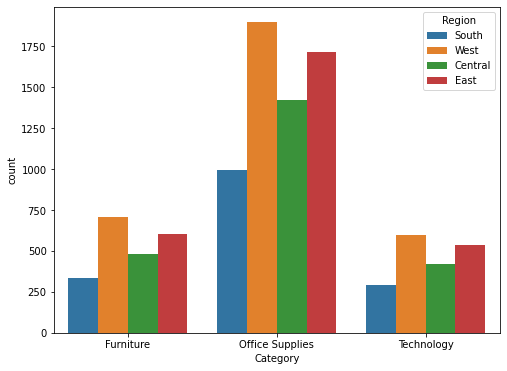

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="Category", hue="Region", data=store_df)

- Customers from side West tend to order more from superstores whereas the customers from east order the least.

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

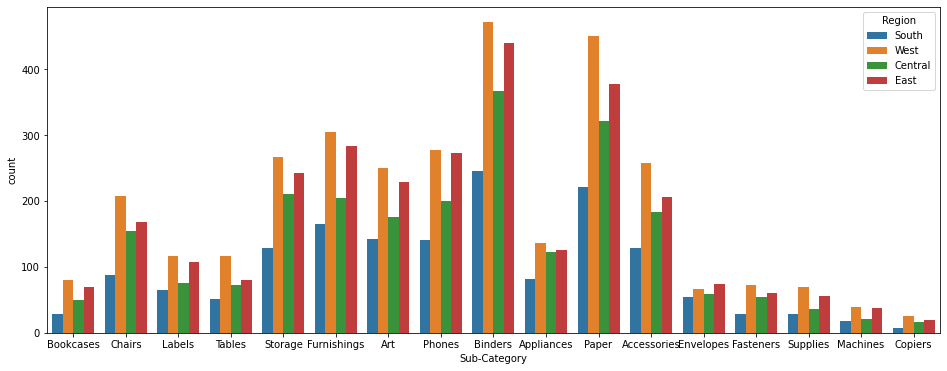

In [19]:
plt.figure(figsize=(16,6))
sns.countplot(x="Sub-Category", hue="Region", data=store_df)

- Binders and papers are the products that were highly purchased from superstore in every region respectively. While copiers being the least bought.

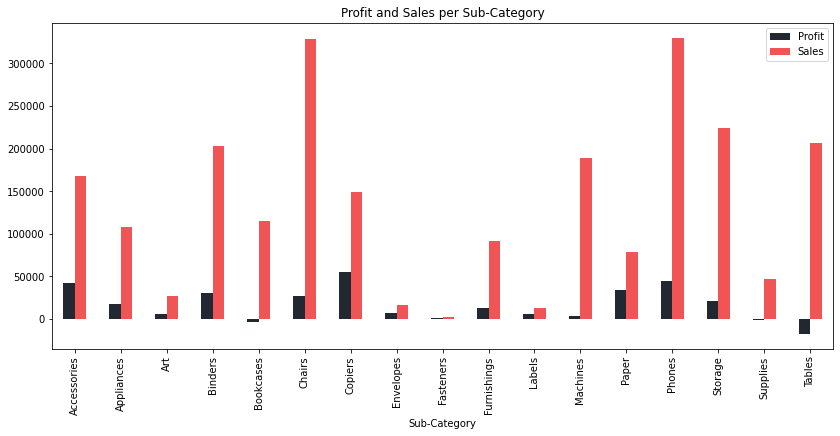

In [20]:
store_df.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar(color=['#222831','#f05454'],figsize=(14,6))
plt.title('Profit and Sales per Sub-Category')
plt.show()

- Copiers Have the highest profit while Selling price for Chairs and Phones are on a extremely higher side compared to other products.

- Customers do not prefer to buy tables and Bookcases from stores hence there is a negative profit.

In [29]:
x= store_df.groupby(['Region'])['Discount'].mean()
y= store_df.groupby(['Region'])['Sales'].count()
z= store_df.groupby(['Region'])['Profit'].mean()

In [30]:
x_df = pd.DataFrame(x).reset_index()
x_df.columns = ['Region', 'Average Discount']
y_df = pd.DataFrame(y).reset_index()
y_df.columns = ['Region', 'Total number of Sales']
z_df = pd.DataFrame(z).reset_index()
z_df.columns = ['Region', 'Average Profit']

In [31]:
disp=pd.merge(left=x_df, right=y_df, how='left', left_on='Region', right_on='Region')
disp=pd.merge(left=disp, right=z_df, how='left', left_on='Region', right_on='Region')

In [32]:
disp

,Region,Average Discount,Total number of Sales,Average Profit
0,Central,0.240353,2323,17.092709
1,East,0.145365,2848,32.135808
2,South,0.147253,1620,28.857673
3,West,0.109335,3203,33.849032


#### Observations:
- Central Region has highest average discount but still has lowest average profit.
- West Region has the least Average Discount but still manages to make more average profit and number of sales than any other region.

#### Conclusion

-  South has the lowest sales in any region. Increasing the average discount on products <b>might</b> give some boost in sales to the store.
- West Region has a pretty good sales and profit. Hence, we can decrease the average discount inorder to increase the average profit and hence also testing the market in that region.
